In [10]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve

def preprocess(filename):
    # Load the CSV file using pandas
    df = pd.read_csv(filename)
    df = df.iloc[0:,1:] # drop filename column
    
    
    y = df['label']
    X = df.loc[:, df.columns != 'label']
    cols = X.columns
    
    scaled_X = preprocessing.StandardScaler().fit_transform(X)
    X = pd.DataFrame(scaled_X, columns=cols)
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=18)
    return X_train, y_train, X_test, y_test

(X_train, y_train, X_test, y_test) = preprocess('features_3_sec.csv')

Training Accuracy: 0.9227977978
Testing Accuracy:  0.8578578579


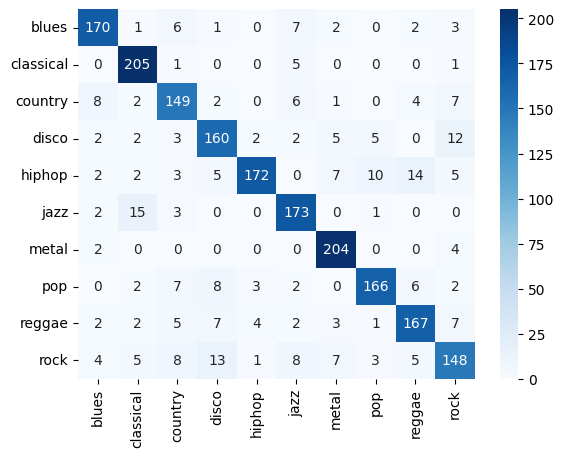

In [11]:
# Support Vector Machine
from sklearn.svm import SVC

def svm(X_train, y_train, X_test, y_test,C=1, need_print=True):
    model = SVC(C=C,kernel='rbf')
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    training_accuracy = round(accuracy_score(y_train, train_pred), 10)
    
    test_pred = model.predict(X_test)
    testing_accuracy = round(accuracy_score(y_test, test_pred), 10)
    
    
    if need_print:
        confusion_matr = confusion_matrix(y_test, test_pred)
        sns.heatmap(confusion_matr, cmap="Blues", annot=True, fmt='d',
                xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
               yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
        plt.savefig("conf matrix")
        print(f"Training Accuracy: {training_accuracy}")
        print(f"Testing Accuracy:  {testing_accuracy}")
    
    return training_accuracy, testing_accuracy, test_pred
    
_ = svm(X_train, y_train, X_test, y_test)

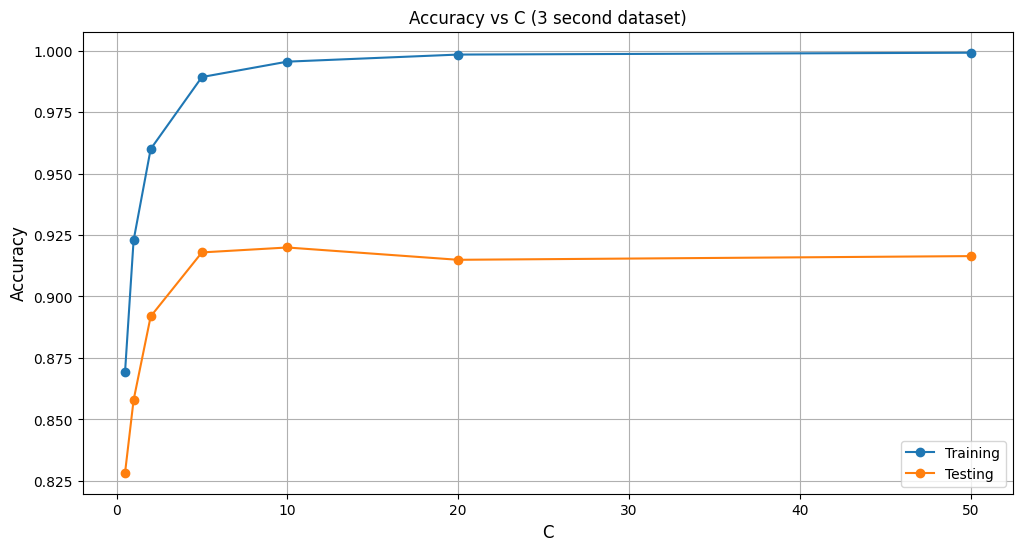

In [14]:
import random
import matplotlib.pyplot as plt

def compare_c():
    c_list = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0])
    testing_acc = np.array([])
    training_acc = np.array([])
    
    for c in c_list:
        testing_a, training_a, _ = svm(X_train, y_train, X_test, y_test,C=c, need_print=False)
        testing_acc = np.append(testing_acc, testing_a)
        training_acc = np.append(training_acc, training_a)
    
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(c_list, testing_acc, label='Training', marker='o')
    plt.plot(c_list, training_acc, label='Testing', marker='o')
    
    # Labels and title
    plt.xlabel('C', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Accuracy vs C (3 second dataset)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    max_training_acc = np.argmax(training_acc)
    return c_list[max_training_acc]
c_opt = compare_c()

0.9199199199


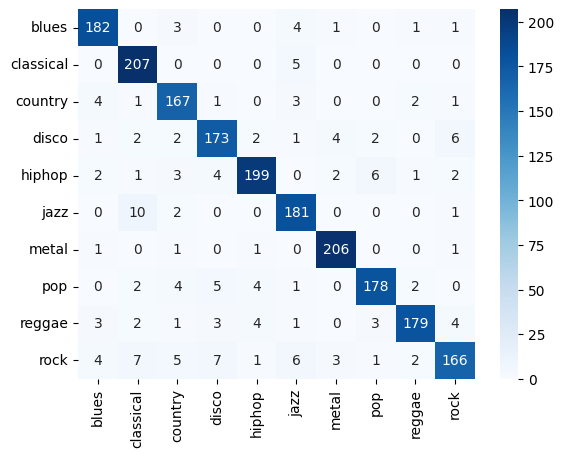

In [16]:
def matrix():
    _,t,preds = svm(X_train, y_train, X_test, y_test,C=c_opt, need_print=False)
    confusion_matr = confusion_matrix(y_test, preds)
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, fmt='d',
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    plt.savefig("conf matrix")
    print(t)
    
matrix()